<a href="https://colab.research.google.com/github/mike-scally/ET5003/blob/main/ET5003_KaggleCompetition_MikeScally_9312951.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID_Name = "9312951 Mike Scally" #@param {type:"string"}
Student_ID_Name = "9312951 Mike Scally" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import cluster

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

### Train dataset

In [12]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Colab Notebooks/data/house-prices/Kaggle Data/'

#training_file = Path + 'house_train.csv'
#testing_file = Path + 'house_test.csv'
#cost_file = Path + 'true_price.csv'

training_file = Path + 'HousePrice_Train.csv'
testing_file = Path + 'HousePrice_Test.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)

# test prices
#dfcost = pd.read_csv(cost_file)

print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)
#print("True Data Shape:", dfcost.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (1638, 14)
Test Data Shape: (702, 13)


In [13]:
print(dftrain.iloc[355,8])

None


In [14]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [15]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


### Test dataset

In [16]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [17]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


#Pre-processing of the data

In [18]:
#Count records where bedrooms or bathrooms are zero
print("\nNumber of records with zero beds:", (dftrain['Num_Beds'] == 0).sum())
print("Number of records with zero bathrooms:", (dftrain['Num_Bathrooms'] == 0).sum())

#Check for empty values in columns
print(dftrain.isna().sum())


Number of records with zero beds: 0
Number of records with zero bathrooms: 0
Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64


Based on the above results, there is no zero values in beds or bathrooms, but lots of empty values in BER_class that would need to be addressed to use this column

In [19]:
#A method that can encode any column based on the values that exist in that column
def encode_colummn(df, column):
  unique_values = df[column].unique().astype(str)

  unique_values.sort()

  scale_mapper = {}
  i = 0
  for s in unique_values:
    scale_mapper[s] = i
    i += 1

  return scale_mapper

In [20]:
#Encoding the BER_class
scale_mapper = {}
if dftrain['BER_class'].dtypes != np.int64:
  dftrain.loc[dftrain['BER_class'] == 'SINo666of2006exempt', 'BER_class'] = 'C3'
  dftrain.loc[dftrain['BER_class'].isna(), 'BER_class'] = 'C3'
  scale_mapper = encode_colummn(dftrain, 'BER_class')
  dftrain['BER_class'] =  dftrain['BER_class'].replace(scale_mapper)


#Encoding the BER_class for test data
if dftest['BER_class'].dtypes != np.int64: 
  dftest.loc[dftest['BER_class'] == 'SINo666of2006exempt', 'BER_class'] = 'C3'
  dftest.loc[dftest['BER_class'].isna(), 'BER_class'] = 'C3'
  dftest['BER_class'] =  dftest['BER_class'].replace(scale_mapper)
  

In [21]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,7,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,11,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,14,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,1,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,13,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


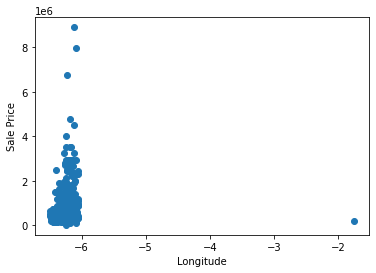

In [22]:
#Lets have a look at longitude values and see if there are outliers
plt.scatter(x=dftrain['Longitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

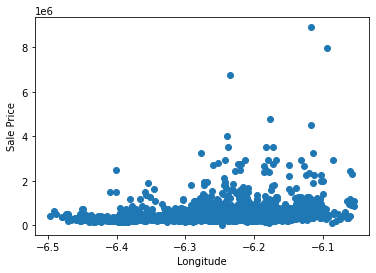

In [23]:
#Remove outliers - where longitude > -4
dftrain = dftrain[dftrain['Longitude'] < -4]
plt.scatter(x=dftrain['Longitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

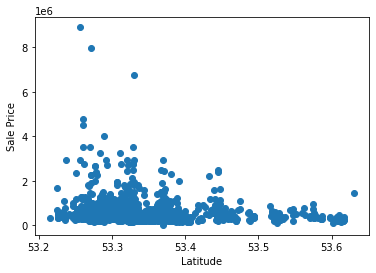

In [24]:
#Lets have a look at the latitude values
plt.scatter(x=dftrain['Latitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Latitude')
plt.show()

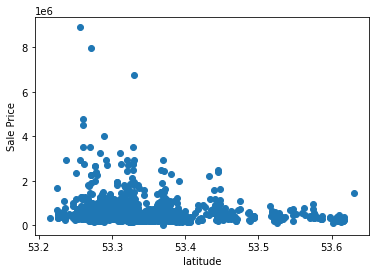

In [25]:
#Remove outliers where latitude < 53
dftrain = dftrain[dftrain['Latitude'] > 53]
plt.scatter(x=dftrain['Latitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('latitude')
plt.show()

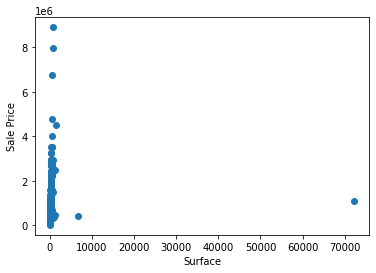

In [26]:
#Lets have a look at the Surface values
plt.scatter(x=dftrain['Surface'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Surface')
plt.show()

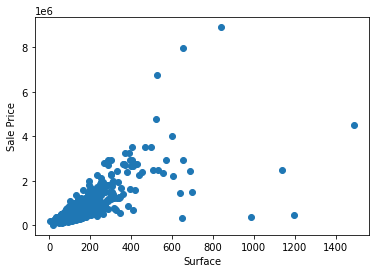

In [27]:
#Remove outliers where surface > 3000
dftrain = dftrain[dftrain['Surface'] < 3000]
plt.scatter(x=dftrain['Surface'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Surface')
plt.show()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [28]:
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

#This function will perform NLP Preprocess, to cleanup data, remove stop words, small words, convert text to lowercase
def NLP_preprocess(input_text):
  #We will utilise the features column to try and add more features to our model using NLP
  new_df = input_text

  #Remove any non-alpha characters
  new_df['clean_features'] = new_df['Features'].str.replace("[^a-zA-Z#]", " ")

  # removing short words
  short_word = 4
  new_df['clean_features'] = new_df['clean_features'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # make all text lowercase
  new_df['clean_features'] = new_df['clean_features'].apply(lambda x: x.lower())

  # tokenization of the features text
  tokenized_doc = new_df['clean_features'].apply(lambda x: x.split())

  # remove stop-words
  swords = stopwords.words('english')
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])

  # de-tokenization back to a string
  detokenized_doc = []
  for ind in new_df.index:
      t = ' '.join(tokenized_doc[ind])
      detokenized_doc.append(t)

  return detokenized_doc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


####TF-IDF Vectorization of Text Features

Now that we have our features cleaned, we will create a matrix of token counts for each work in each of the features. This will produce a sparese representation of the counts

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

#This function will ceate a matrix token count of words to determine words used most often
def get_matrix_token_counts(input_text):
  cv = CountVectorizer()
  word_count_vector = cv.fit_transform(new_df['clean_features'])
  tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
  #print(tf.head(10))

  #We will now convert the count matrix to a normalised TF-IDF representation of the data
  tfidf_transformer = TfidfTransformer()
  X = tfidf_transformer.fit_transform(word_count_vector)
  idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})

  #print(idf.sort_values(by=['idf_weights'][0:10], ascending=False))  
  return idf


We can see from the list above the IDF weights for each of the words in all of the features. Ideally, we would complete some further analysis perhaps using XG-Boost or similar to determine which of the words have a best correlation with the price. However, instead here due to time constraints, I will select 3 features to add that appear in the top list above: garden, parking & heating. We will add these as new features to our model, usig the TF-IDF score for each of the words in each of the features

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Calculate the TF-IDF scores for each of the words for each of the features, and we will use this as part of our new features to add to the data
def get_IDF_values(input_text):
  vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, min_df=0.5, smooth_idf=True)
  #print(vectorizer)

  vectorizer = TfidfVectorizer()
  #voc_idf = vectorizer.fit_transform(new_df['clean_features'])
  voc_idf = vectorizer.fit_transform(input_text)
  feature_names = vectorizer.get_feature_names()

  ind_garden_feature = feature_names.index("garden")
  ind_parking_feature = feature_names.index("parking")
  ind_heating_feature = feature_names.index("heating")

  #print("Index of garden in feature names:", ind_garden_feature)
  #print("Index of parking in feature names:", ind_parking_feature)
  #print("Index of heating in feature names:", ind_heating_feature)

  #Get the IDF score for each of the three chosen words in the features for each training record
  voc_idf_array = voc_idf.toarray()

  garden_scores = [0 for x in range(len(input_text))] 
  parking_scores = [0 for x in range(len(input_text))] 
  heating_scores = [0 for x in range(len(input_text))] 

  for i in range(len(input_text)):
      garden_scores[i] = voc_idf_array[i][ind_garden_feature]
      parking_scores[i] = voc_idf_array[i][ind_parking_feature]
      heating_scores[i] = voc_idf_array[i][ind_heating_feature]

  return garden_scores, parking_scores, heating_scores 

In [31]:
#We will first clean our features, determine the best words to use, and then get the TF-IDT scores for the selected features to add to our training dataset
new_df = pd.DataFrame({'Features':dftrain["Features"]})
new_df['clean_features'] = NLP_preprocess(new_df)

matrix_token_counts = get_matrix_token_counts(new_df['clean_features'])

out_garden_scores, out_parking_scores, out_heating_scores = get_IDF_values(new_df['clean_features'])

  #Lets have a look at the scores, this is for the first 6 houses in the training set, and the first column us garden, 2nd is parking, 3rd is heating
print("\nGarden scores for the first 6 houses in the training set: ", out_garden_scores[0:6])
print("Parking scores for the first 6 houses in the training set: ", out_parking_scores[0:6])
print("Heating scores for the first 6 houses in the training set: ", out_heating_scores[0:6])

dftrain["garden_scores"] = out_garden_scores
dftrain["parking_scores"] = out_parking_scores
dftrain["heating_scores"] = out_heating_scores


Garden scores for the first 6 houses in the training set:  [0.0, 0.08625856336609469, 0.08316653548604572, 0.07784275597850195, 0.0, 0.0]
Parking scores for the first 6 houses in the training set:  [0.0, 0.0, 0.1558323067275024, 0.07292846909675205, 0.0, 0.0]
Heating scores for the first 6 houses in the training set:  [0.0, 0.08536222574824544, 0.0, 0.0, 0.0, 0.0]


In [32]:
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price,garden_scores,parking_scores,heating_scores
0,1,12409116,Ongar,2,2,8,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000,0.000000,0.000000,0.000000
1,2,12320330,North Strand,1,2,9,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,0.086259,0.000000,0.085362
2,3,12405953,Stepaside,3,3,2,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,0.083167,0.155832,0.000000
3,4,12202582,Cabinteely,1,3,11,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,0.077843,0.072928,0.000000
4,5,12299336,Lusk,3,4,9,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,0.000000,0.000000,0.000000


In [33]:
#We need to do the same for our test dataset, we don;t need to find the best words to use this time as they were already selected from the training dataset
new_test_df = pd.DataFrame({'Features':dftest["Features"]})
new_test_df['clean_features'] = NLP_preprocess(new_test_df)

out_garden_scores, out_parking_scores, out_heating_scores = get_IDF_values(new_test_df['clean_features'])

#Lets have a look at the scores, this is for the first 6 houses in the training set, and the first column us garden, 2nd is parking, 3rd is heating
print("\nGarden scores for the first 6 houses in the training set: ", out_garden_scores[0:6])
print("Parking scores for the first 6 houses in the training set: ", out_parking_scores[0:6])
print("Heating scores for the first 6 houses in the training set: ", out_heating_scores[0:6])

dftest["garden_scores"] = out_garden_scores
dftest["parking_scores"] = out_parking_scores
dftest["heating_scores"] = out_heating_scores


Garden scores for the first 6 houses in the training set:  [0.0, 0.1824047708802673, 0.0, 0.1936920435115649, 0.13329846288568625, 0.0]
Parking scores for the first 6 houses in the training set:  [0.1420521786736159, 0.08628600659771288, 0.18658200649696532, 0.18325083125521907, 0.0, 0.0]
Heating scores for the first 6 houses in the training set:  [0.0, 0.0, 0.1939310884058845, 0.0, 0.13108016801336755, 0.0]


In [34]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,garden_scores,parking_scores,heating_scores
0,1639,12292473,Milltown,2,2,7,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0,0.000000,0.142052,0.000000
1,1640,12314667,Glasnevin,2,5,11,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0,0.182405,0.086286,0.000000
2,1641,11699240,Dalkey,1,2,14,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0,0.000000,0.186582,0.193931
3,1642,12416984,Raheny,4,4,1,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0,0.193692,0.183251,0.000000
4,1643,12383407,Crumlin,2,3,13,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0,0.133298,0.000000,0.131080


In [35]:
# Specify the features we will use to train the model

featrain = ['Num_Beds','Num_Bathrooms','Latitude', 'Longitude', 'Surface', 'garden_scores', 'parking_scores', 'heating_scores', 'BER_class',  'Price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['Num_Beds','Num_Bathrooms','Latitude', 'Longitude', 'Surface', 'garden_scores', 'parking_scores', 'heating_scores', 'BER_class']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
#df_subset_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

print(df_subset_train.shape)
print(df_subset_test.shape)
#print(df_subset_cost.shape)

(1635, 10)
(702, 9)


In [36]:
#Check that all our nan values are now removed
print('Number of nan in df_subset_train dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [37]:
# train set, input columns
Xs_full_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_subset_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)
#print("y_test shape:", y_test.shape)

Xs_train shape: (1635, 9)
ys_train shape: (1635,)
Xs_test shape: (702, 9)


In [38]:
#We split the training dataset into training and validation, so we can validate/evaluate the model on the training data
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (1308, 9)
y train shape: (1308, 1)
X validation shape: (327, 9)
y validation shape: (327,)
X test shape: (702, 9)


In [39]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#We don't want to scale or transform our validation true values
yn_val = ys_val

# PIECEWISE REGRESSION

In [40]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,289.9


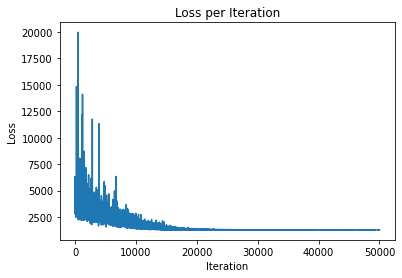

In [41]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [42]:
# samples from the posterior
posterior = approximation.sample(5000)

In [43]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - yn_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - yn_val) / yn_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(yn_val, y_pred_BLR))
print("RMSE = ", rms)

MAE =  193048.10249632952
MAPE =  0.28120364402085124
RMSE =  524933.6239918853


**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

### Gaussian Mixture Model 
We need to determine the optimum number of clusters to use

### Determine the number of clusters - K-Means

We will use K-Means clustering to partition all our data points into k clusters. We will try for multiple different clusters, and calculate the inertia for each cluster, which is the sum of the distances of the samples to their closest cluster center. 

We are looking for an 'elbow' in the graph to determine the most appropriate k value. From the plot below, it appears 4 or 5 clusters are the optimum, I will choose 5 as an extra cluster might give a slight improvement in the model without overfitting.

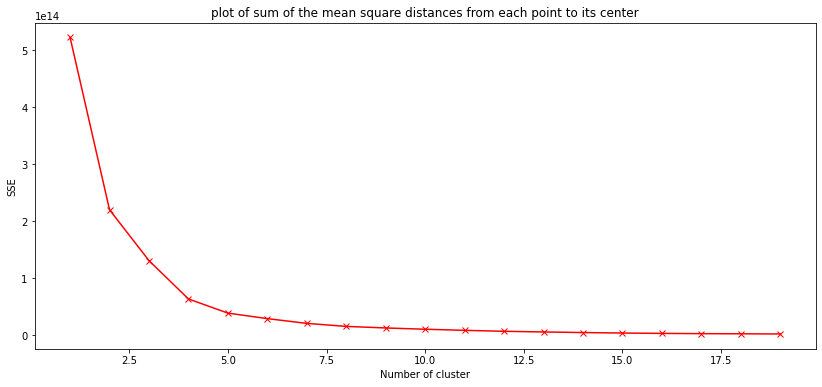

In [44]:
data = df_subset_train

sse = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(init='k-means++', n_clusters=k, max_iter=300).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(figsize=(14, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'rx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("plot of sum of the mean square distances from each point to its center")
plt.show()

From the plot above, the elbow seems to occur at 4 clusters, so we will use that

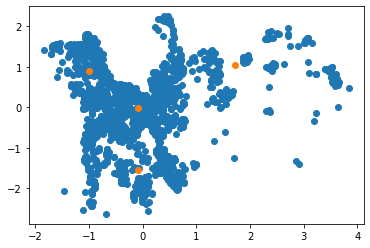

In [45]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features latitude and longitude
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


### Generating Clusters of Data

In [46]:
# split the data for train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 236, 1: 183, 2: 649, 3: 240}

In [47]:
# split the data for validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 65, 1: 57, 2: 146, 3: 59}

In [48]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [49]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]

ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [50]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [51]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model
Train a different model on each of the clusters individually

In [52]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 215.54


In [53]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 201.04


In [54]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 578.67


In [55]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 315.6


## Simulations
We review how the predicted values from the model compare with the true values using posterior predictive checks

In [56]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



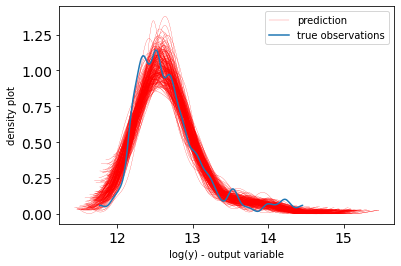

In [57]:
#Simulation CLuster 0
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

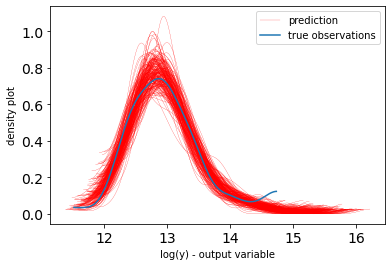

In [58]:
#Simulation Cluster 1
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

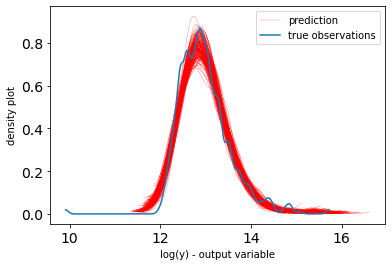

In [59]:
#Simulation Cluster 2
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

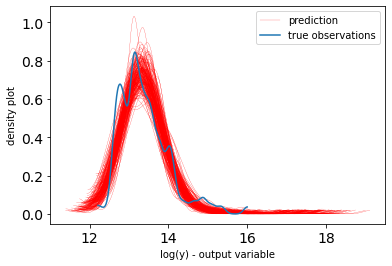

In [60]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

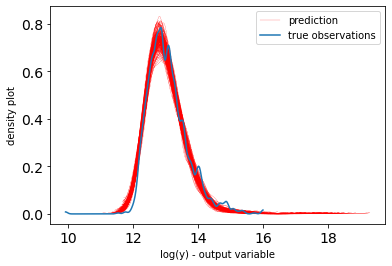

In [61]:
#Simulation on all clusters combined
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Evaluate Performance on Validation Dataset

In [62]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", \nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - yn_val[clusters_test==0]),
                 abs(y_pred_BLR1 - yn_val[clusters_test==1]),
                 abs(y_pred_BLR2 - yn_val[clusters_test==2]),
                 abs(y_pred_BLR3 - yn_val[clusters_test==3])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0],
                        abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1],
                        abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2],
                        abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3]
                       ]))

# MAE
print("Overall MAE=",np.mean(joint))
print("Overall MAPE = ", joint_mape)

Size Cluster0 65 , 
MAE Cluster0= 3095371.3493325384
MAPE =  1.3459589333378992
Size Cluster1 57 , MAE Cluster1= 86828.90517993514
MAPE =  0.15153583907880674
Size Cluster2 146 , MAE Cluster2= 314903.5961612019
MAPE =  0.7194160015935629
Size Cluster3 59 , MAE Cluster3= 326686.16079884366
MAPE =  0.2698424850815378
Overall MAE= 829965.7303625033
Overall MAPE =  0.6638541784309674


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

Reference Document:

https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/bayesian_neural_network_opvi-advi.html

In [63]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 25
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [64]:
# this can be slow because there are many parameters

# some parameters
par1 = 25  # start with 100, then use 1000+
par2 = 250 # start with 1000, then use 10000+

# neural network
#with neural_network:
#    posterior = pm.sample(par1,tune=par2,chains=1)

In [65]:
# we can do instead an approximated inference
param3 = 10000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.sgd # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.1    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,260.3


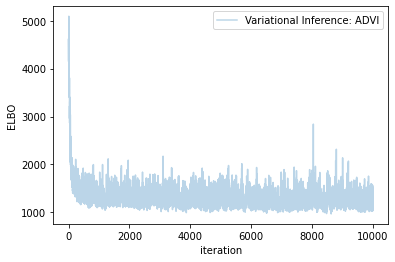

In [66]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [67]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

###Evaluate model on validation data set

In [68]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_val_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_val_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_val_pred).mean(axis=0)

In [69]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_val_pred))

In [70]:
print("MAE = ",(np.mean(abs(y_val_pred_final - yn_val))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - yn_val) / yn_val)))

MAE =  144053.22360641745
MAPE =  0.20340298953522787


###Predict new y values for test data

In [71]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [72]:
y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

#print(y_pred_final)

In [73]:
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_final})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df.to_csv(f"House Price Prediction_{date}.csv", index=False)

# SUMMARY

Your summary here.